In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

In [3]:
# Функция transpose принимает матрицу в качестве аргумента и возвращает ее транспонированную версию
def transpose(matrix):
    # Проверяем, являются ли элементы первой строки матрицы буквами
    # Если нет, то возвращаем исходную матрицу
    if not (str(matrix[0]).isalpha()):
        return matrix
    # Создаем новую матрицу, которая имеет размеры, обратные размерам исходной матрицы
    result = np.ones((len(matrix[0]), len(matrix)))
    # Проходим по элементам исходной матрицы в двойном цикле
    for j in range(len(matrix)):
        for i in range(len(matrix[0])):
            # Записываем значения соответствующих элементов исходной матрицы в новую матрицу, но уже в транспонированном виде
            result[i][j] = matrix[j][i]
    # Возвращаем транспонированную матрицу
    return result

In [4]:
# Функция LU принимает матрицу в качестве аргумента и возвращает ее разложение на нижнетреугольную и верхнетреугольную матрицы
def LU(matrix):
    # Получаем размеры матрицы
    matrix_coloumns = len(matrix[0]) # количество столбцов
    matrix_rows = len(matrix) # количество строк
    # Создаем матрицы L и U, заполненные нулями, и устанавливаем значения на диагонали L равными 1
    L = [] # нижнетреугольная матрица
    U = [] # верхнетреугольная матрица
    i = 0
    j = 0
    # проходим по строкам матрицы
    while i < matrix_rows:
        # добавляем новую строку в матрицу L
        L.append([])
        # добавляем новую строку в матрицу U
        U.append([])
        # проходим по столбцам матрицы
        while j < matrix_coloumns:
            # если мы находимся на диагонали, то элемент матрицы L равен 1
            if i == j:
                L[i].append(1)
            # иначе элемент матрицы L равен 0, а элемент матрицы U равен 0
            else:
                L[i].append(0)
            U[i].append(0)
            j += 1
        j = 0
        i += 1
    j = 0  # j is the coloumn number
    i = 0  # i is the row number
    N = matrix_coloumns
    # проходим по столбцам матрицы
    while j <= N - 1: 
        # проходим по строкам матрицы до текущего столбца включительно
        while i <= j:
            k = 0
            # сумма для вычисления элементов матрицы U
            sumU = 0
            # проходим по строкам матрицы до текущей строки не включительно
            while k <= (i - 1):
                sumU += L[i][k] * U[k][j] # вычисляем сумму
                k += 1
            if i == 0:
                sumU = 0
            U[i][j] = matrix[i][j] - sumU # вычисляем элемент матрицы U
            i += 1
        i = j + 1
        # проходим по строкам матрицы после текущего столбца
        while i <= N - 1:
            k = 0
            # сумма для вычисления элементов матрицы L
            sumL = 0
            # проходим по столбцам матрицы до текущего столбца не включительно
            while k <= (j - 1):
                sumL += L[i][k] * U[k][j] # вычисляем сумму
                k += 1
            if j == 0:
                sumL = 0
            L[i][j] = (1 / (U[j][j])) * (matrix[i][j] - sumL) # вычисляем элемент матрицы L
            i += 1
        i = 0
        j += 1

    # Возвращаем матрицы L и U    
    return L, U

In [5]:
# Функция решает систему линейных уравнений с помощью LU-разложения и прямой/обратной подстановки
# Она принимает три аргумента: L (нижняя треугольная матрица), U (верхняя треугольная матрица) и b (вектор констант)
def solvex(L, U, b):
    N = len(L) - 1
    x = []
    y = []

    for c in range(N + 1):
        x.append(0)
        y.append(0)
    i = 1 
    y[0] = b[0] / L[0][0]
    j = 0

    # Выполняем прямую подстановку, чтобы найти y в Ly = b
    while i <= N:
        sumay = 0
        while j <= i - 1:
            sumay += L[i][j] * y[j]
            j += 1
        j = 0
        y[i] = (1 / L[i][i]) * (b[i] - sumay)
        i += 1

    x[N] = y[N] / U[N][N]
    i = N - 1

    # Выполняем обратную подстановку, чтобы найти x в Ux = y
    while i >= 0:
        j = i + 1
        sumax = 0
        while j <= N:
            sumax += U[i][j] * x[j]
            j += 1
        j = 0
        x[i] = (1 / U[i][i]) * (y[i] - sumax)
        i -= 1
        
    # Возвращаем вектор решений x
    return x

In [6]:
# Функция вычисляет обратную матрицу с помощью LU-разложения и прямой/обратной подстановки
# Принимает на вход матрицу
def inverse(matrix):
    i = 0
    n = len(matrix[0])
    # Создаём единичную матрицу того же размера, что и входная матрица
    I = np.identity(n)
    # Создаём вектор из единиц того же размера, что и входная матрица
    b = np.ones(n)
    # Инициализируем матрицу нулей того же размера, что и входная матрица, которая будет хранить обратную матрицу
    matrix_inverse = np.zeros((n, n))

    # Вычисляем LU-разложение входной матрицы
    L = LU(matrix)[0]
    U = LU(matrix)[1]

    entries = len(b) - 1
    # Проходим через каждый столбец единичной матрицы и решаем соответствующий столбец обратной матрицы с помощью прямой/обратной подстановки
    while i <= entries:
        for v in range(len(I)):
            b[v] = I[i][v]
        col = solvex(L, U, b)
        # Сохраняем решенный столбец в обратную матрицу
        for m in range(len(col)):
            matrix_inverse[m][i] = col[m]
        i += 1
    # Возвращаем обратную матрицу
    return matrix_inverse

In [7]:
# Функция выполняет умножение матрицы на скаляр
# Принимает на вход две матрицы
def matrix_scalar_mult(A, B):
    # Определяем размеры матриц и создает пустой список для результата
    p = A.shape[0]
    q = 1 if len(A.shape) == 1 else len(A[0])
    t = len(B)
    r = 1 if len(B.shape) == 1 else len(B[0])
    result = []
    # Проверяем, является ли одна из матриц вектором (т.е. имеет ли она только один столбец или строку)
    if q == 1:
        # Если одна из матриц - вектор, то выполняем умножение матрицы на вектор
        # Проходим по каждому элементу вектора и каждому элементу соответствующего столбца (если матрица - столбец) или строки (если матрица - строка) и вычисляем скалярное произведение
        for i in range(p):
            s = 0
            for k in range(r):
                s += A[k] * B[k][i]
            result.append(s)
        return np.array(result)
    if r == 1:
        for i in range(p):
            s = 0
            for j in range(q):
                s += A[i][j] * B[j]
            result.append(s)
        return np.array(result)
    # Если обе матрицы не являются векторами, то выполянем обычное умножение матриц
    # Проходим по каждой строке первой матрицы и каждому столбцу второй матрицы и вычисляем скалярное произведение
    if q != 1 and r != 1:
        for i in range(p):
            row = []
            for j in range(r):
                s = 0
                for k in range(q):
                    s += A[i][k] * B[k][j]
                row.append(s)
            result.append(row)
            
    # Сохраняем результат в список и возвращаем его
    return np.array(result)

In [8]:
def E(t):
    return E0 + Ec * math.cos(2 * math.pi * t / T) + Es * math.sin(2 * math.pi * t / T)


In [9]:
def diL(iL, UC, t):
    return (R1 * R3 + R2 * R3 + R2 * R1) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * UC / L \
           + (-R4 * R3 * R1 - R4 * R2 * R3 - R4 * R2 * R1) / (
                   R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * iL / L \
           + (R4 * R1 + R4 * R2) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * E(t) / L


In [10]:
def dUC(UC, iL, t):
    return (-R1 - R2) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * UC / C \
           + (R1 + R2) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * E(t) / C \
           + (-R1 * R3 - R2 * R3 - R2 * R1) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * iL / C


In [11]:
def Ur3(iL, UC, t):
    return (R1 + R2) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * E(t) \
           + (R4 * R1 + R4 * R2) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * iL \
           + (-R1 - R2) / (R1 * R3 + R2 * R3 + R2 * R1 + R4 * R1 + R4 * R1 + R4 * R2) * UC


In [12]:
def runge_kutta(I, U, t, dt, f1, f2):
    Ik1 = dt * f1(I, U, t)
    Uk1 = dt * f2(U, I, t)
    Ik2 = dt * f1(I + 0.5 * Ik1, U + 0.5 * Uk1, t + dt * 0.5)
    Uk2 = dt * f2(U + 0.5 * Uk1, I + 0.5 * Ik1, t + dt * 0.5)
    Ik3 = dt * f1(I + 0.5 * Ik2, U + 0.5 * Uk2, t + dt * 0.5)
    Uk3 = dt * f2(U + 0.5 * Uk2, I + 0.5 * Ik2, t + dt * 0.5)
    Ik4 = dt * f1(I + Ik3, U + Uk3, t + dt)
    Uk4 = dt * f2(U + Uk3, I + Ik3, t + dt)
    return I + (Ik1 + 2 * Ik2 + 2 * Ik3 + Ik4) / 6, U + (Uk1 + 2 * Uk2 + 2 * Uk3 + Uk4) / 6


In [13]:
# Функция выполняет фильтрацию Калмана для заданных матриц и входных данных
# Она принимает на вход вектор измерений z, а также матрицы F, Q, H, R
# Матрица F - матрица перехода состояний, которая определяет, как изменяется состояние системы со временем
# Матрица Q - ковариационная матрица шума системы
# Матрица H - матрица наблюдений, которая определяет, как измерения связаны со состоянием системы
# Матрица R - ковариационная матрица шума измерений
# Сначала функция определяет размер вектора измерений и инициализирует начальное состояние системы x и матрицу ковариации P
def kalman_filter(z,
                  F=np.eye(2),
                  Q=np.eye(2) * 3e-3,
                  H=np.eye(2),
                  R=np.eye(2) * 3e-3
                  ):
    n = z.shape[0]
    x = transpose(z[0, :])
    P = Q
    r = [x]
    # Проходим по всем измерениям вектора z
    for i in range(1, n):
        # Вычисляем прогноз состояния системы на основе предыдущего состояния и матрицы перехода F
        x = matrix_scalar_mult(F, x)
        # Вычисляем прогноз ковариации ошибки на основе предыдущей ковариации и матрицы перехода F
        P = matrix_scalar_mult(matrix_scalar_mult(F, P), transpose(F)) + Q
        
        # Вычисляем инновацию - разницу между текущим измерением и прогнозом измерения на основе текущего состояния системы и матрицы наблюдений H
        y = z[i] - matrix_scalar_mult(H, x)
        # Вычисляем ковариацию ошибки инновации на основе текущей ковариации ошибки, матрицы наблюдений H и матрицы R
        S = matrix_scalar_mult(matrix_scalar_mult(H, P), transpose(H)) + R
        # Вычисляем оптимальную коррекцию состояния системы на основе инновации, ковариации ошибки инновации и матрицы наблюдений H
        K = matrix_scalar_mult(matrix_scalar_mult(P, transpose(H)), inverse(S))

        # Выполнение коррекции состояния системы на основе инновации и оптимальной коррекции, которые были рассчитаны в процессе фильтрации Калмана
        # Коррекция состояния вычисляется путем умножения матрицы K (оптимальной коррекции) на вектор инновации y и добавления результата к текущему состоянию системы x
        x = x + matrix_scalar_mult(K, y)
        # Вычисляем оптимальную коррекцию ковариации ошибки на основе оптимальной коррекции состояния системы, матрицы наблюдений H и текущей ковариации ошибки
        P = matrix_scalar_mult((np.eye(z.shape[1]) - matrix_scalar_mult(K, H)), P)

        # Сохраняем текущее состояние системы в список r
        r.append(transpose(x))

    return np.array(r)

In [14]:
E0 = 110
Ec = 50
Es = 50
R1, R2, R3, R4, R5 = 1, 1, 1, 100, 100
T = 0.01
C = 10 ** -2.5

 <h1>L = 10 ** -4</h1>

In [14]:
L = 10 ** -4

I0 = 0
U0 = 0

I = []
U = []
Ur = []
Time = []

t = 0
dt = 0.0002
q=0

In [15]:
while t < 0.102:
    I0, U0 = runge_kutta(I0, U0, t, dt, diL, dUC)
    Ur.append(Ur3(I0, U0, t))
    t += dt
    q+=1
    Time.append(t)
    I.append(I0)
    U.append(U0)

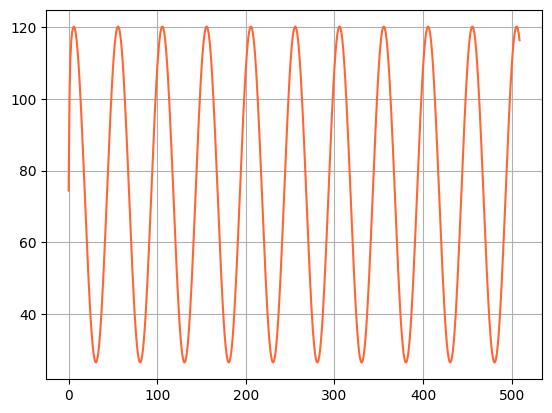

In [16]:
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.grid(True)
plt.show()

<h2> Рандомный шум</h2>

In [17]:
d = np.array(list(zip(Time, I)))
dn = d + (np.random.rand(q, 2) - 0.5) * np.array([2e-2, 6])

fix = kalman_filter(dn)

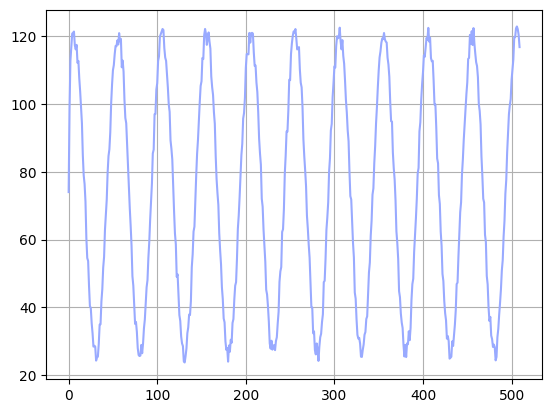

In [18]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

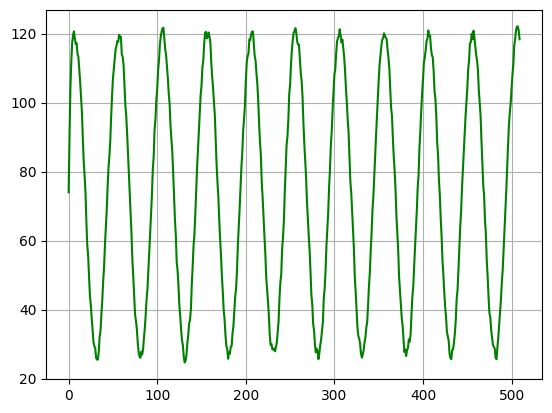

In [19]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

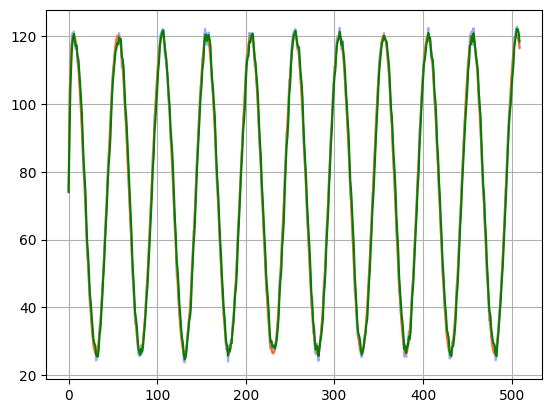

In [20]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2> Белый шум</h2>

In [21]:
d = np.array(list(zip(Time, I)))
dn = d + np.random.normal(0, 1, (q, 2)) * np.array([1, 1])

fix = kalman_filter(dn, R=np.eye(2) * 6e-3)

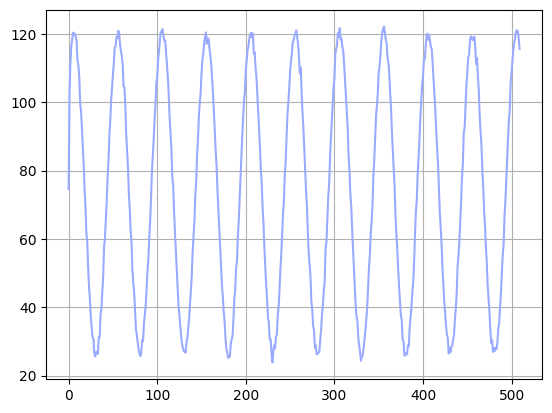

In [22]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

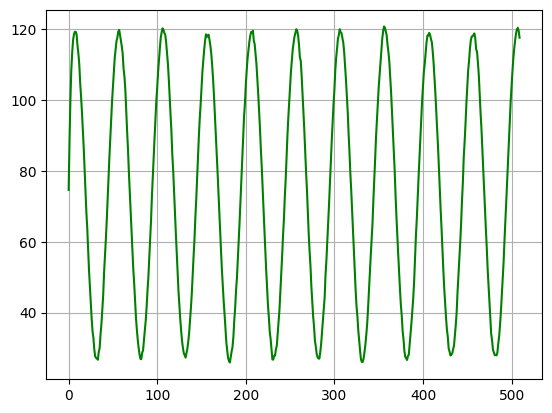

In [23]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

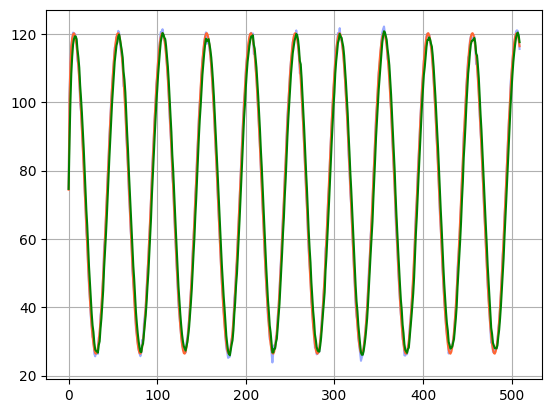

In [24]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2>Распределение Коши</h2>

In [25]:
d = np.array(list(zip(Time, I)))
dn = d + cauchy.rvs(2, 0.1, (510, 2)) * np.array([1, 1])

fix = kalman_filter(dn,  R=np.eye(2) * 6e-3)

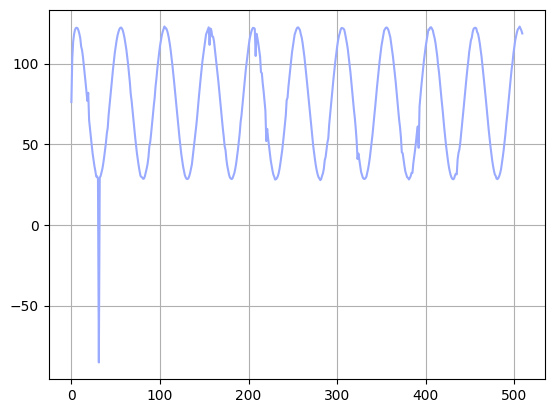

In [26]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

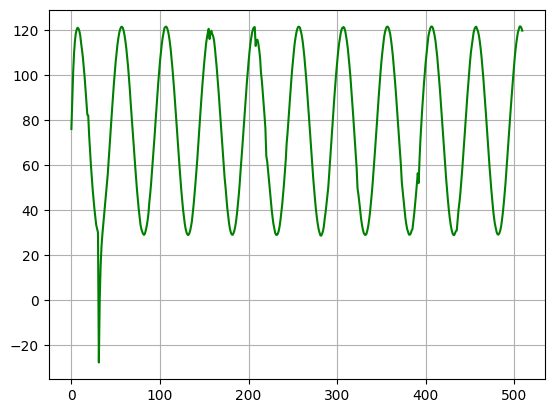

In [27]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

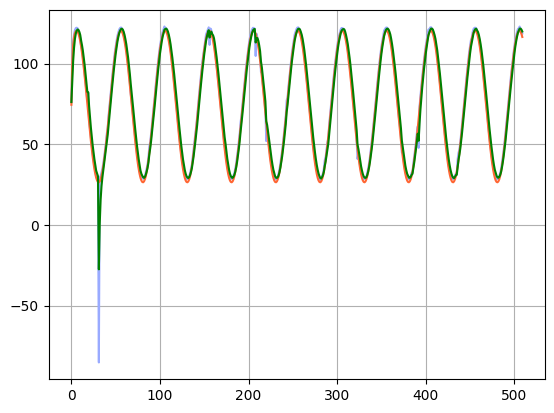

In [28]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

# <h1>L = 10 ** -3</h1>

In [29]:
L = 10 ** -3

I0 = 0
U0 = 0

I = []
U = []
Ur = []
Time = []

t = 0
dt = 0.0002
q=0


In [30]:
while t < 0.102:
    I0, U0 = runge_kutta(I0, U0, t, dt, diL, dUC)
    Ur.append(Ur3(I0, U0, t))
    t += dt
    q+=1
    Time.append(t)
    I.append(I0)
    U.append(U0)

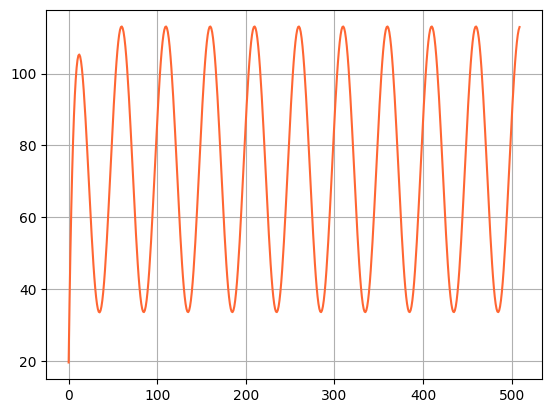

In [31]:
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.grid(True)
plt.show()

<h2> Рандомный шум</h2>

In [32]:
d = np.array(list(zip(Time, I)))
dn = d + (np.random.rand(q, 2) - 0.5) * np.array([2e-2, 6])

fix = kalman_filter(dn)

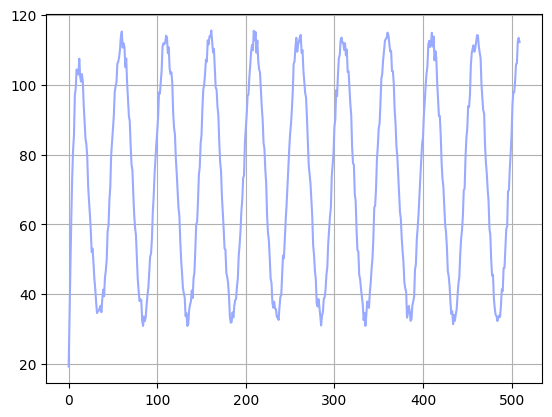

In [33]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

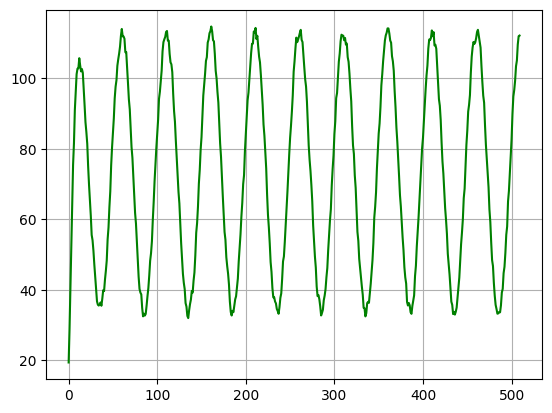

In [34]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

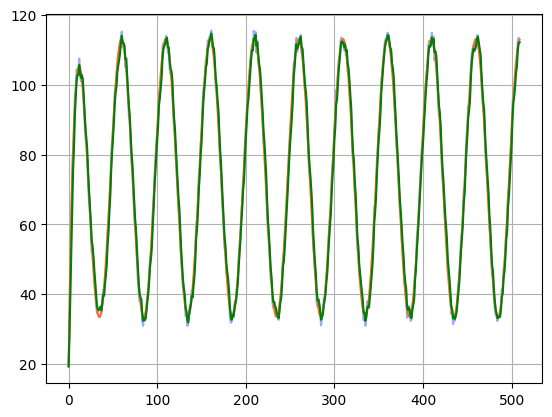

In [35]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2> Белый шум</h2>

In [36]:
d = np.array(list(zip(Time, I)))
dn = d + np.random.normal(0, 1, (q, 2)) * np.array([1, 1])

fix = kalman_filter(dn, R=np.eye(2) * 6e-3)

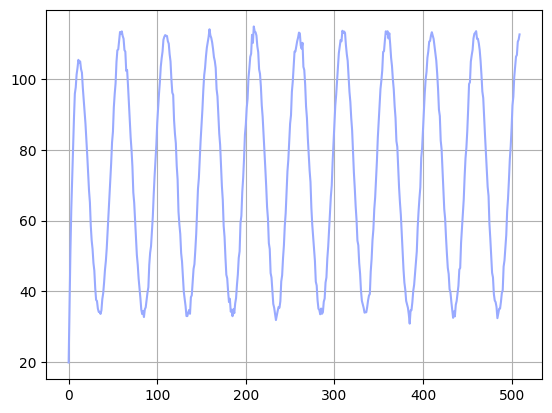

In [37]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

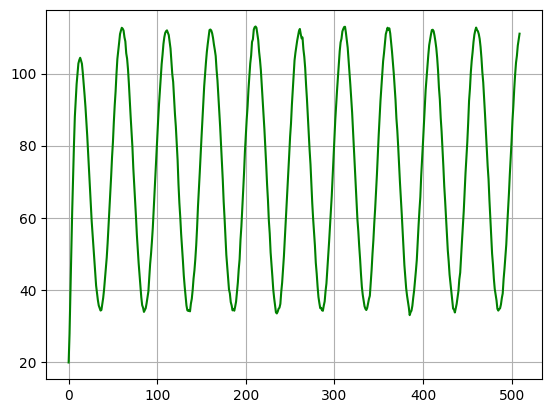

In [38]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

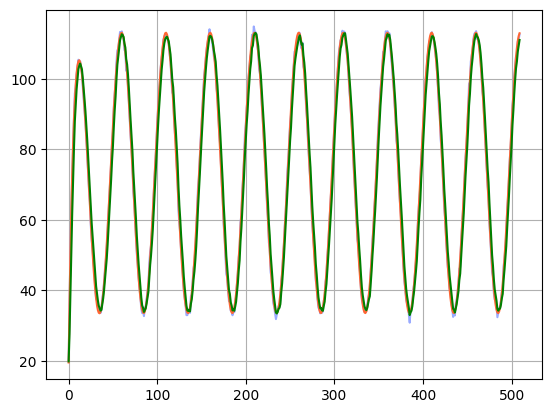

In [39]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2>Распределение Коши</h2>

In [40]:
d = np.array(list(zip(Time, I)))
dn = d + cauchy.rvs(1, 0.1, (q, 2)) * np.array([1, 1]) 

fix = kalman_filter(dn, R=np.eye(2) * 6e-3)

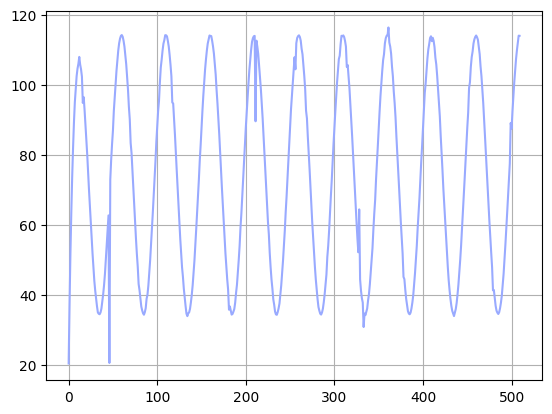

In [41]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

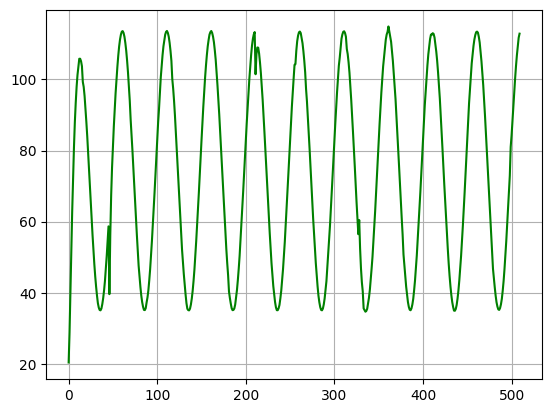

In [42]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

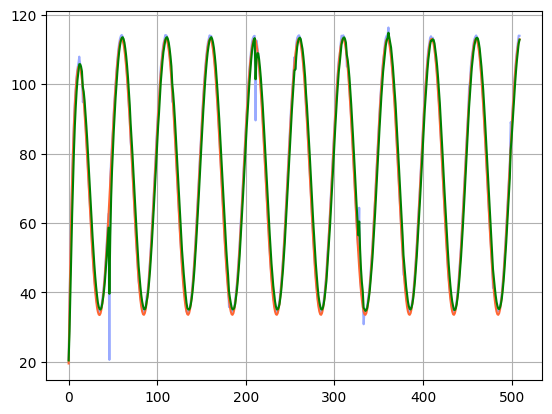

In [43]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

  <h1>L = 10 ** -2</h1>

In [44]:
L = 10 ** -2

I0 = 0
U0 = 0

I = []
U = []
Ur = []
Time = []

t = 0
dt = 0.0002
q=0

In [45]:
while t < 0.102:
    I0, U0 = runge_kutta(I0, U0, t, dt, diL, dUC)
    Ur.append(Ur3(I0, U0, t))
    t += dt
    q+=1
    Time.append(t)
    I.append(I0)
    U.append(U0)

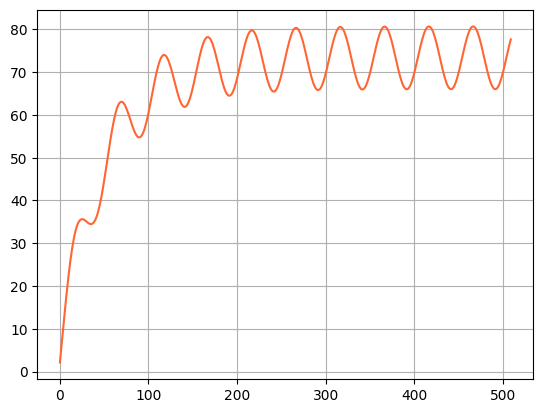

In [46]:
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.grid(True)
plt.show()

<h2> Рандомный шум</h2>

In [47]:
d = np.array(list(zip(Time, I)))
dn = d + (np.random.rand(q, 2) - 0.5) * np.array([2e-2, 6])

fix = kalman_filter(dn, R=np.eye(2) * 4e-2)

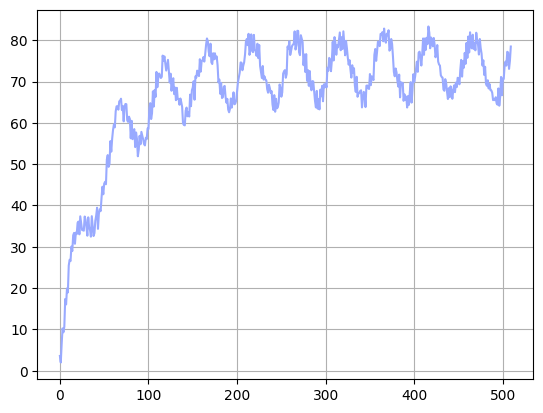

In [48]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

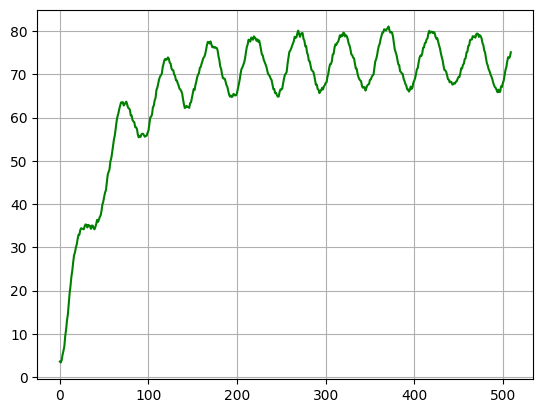

In [49]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

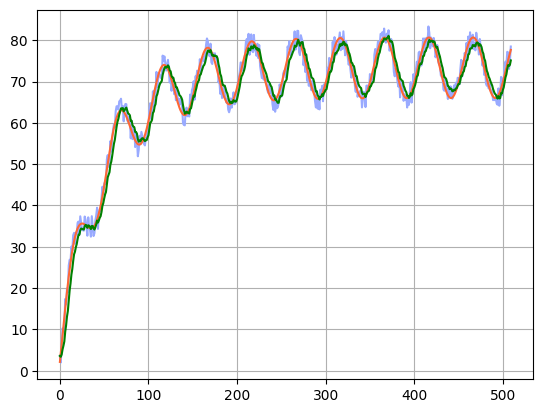

In [50]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2> Белый шум</h2>

In [51]:
d = np.array(list(zip(Time, I)))
dn =d + np.random.normal(0, 1, (q, 2)) * np.array([1, 1])

fix = kalman_filter(dn)

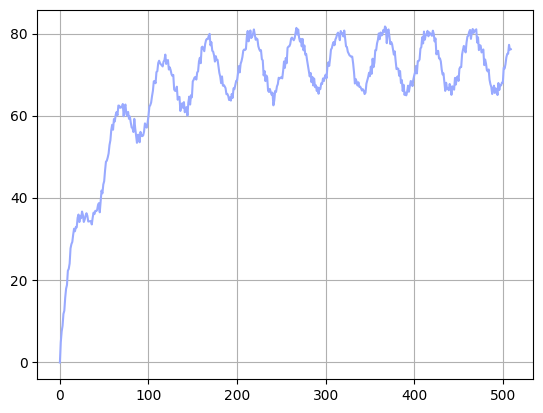

In [52]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

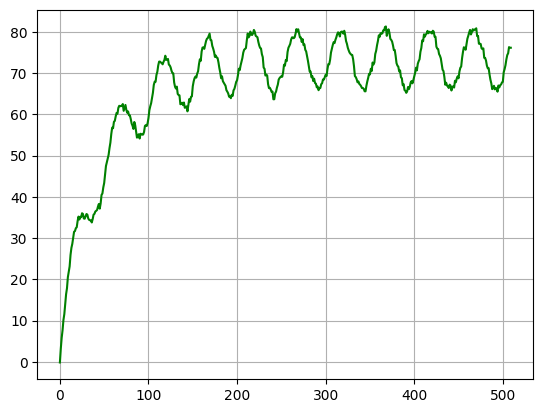

In [53]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

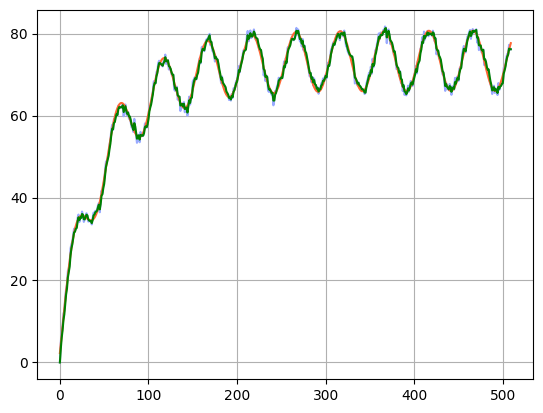

In [54]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2> Распределение Коши</h2>

In [55]:
d = np.array(list(zip(Time, I)))
dn = d + cauchy.rvs(1, 0.1, (q, 2)) * np.array([1, 1])

fix = kalman_filter(dn)

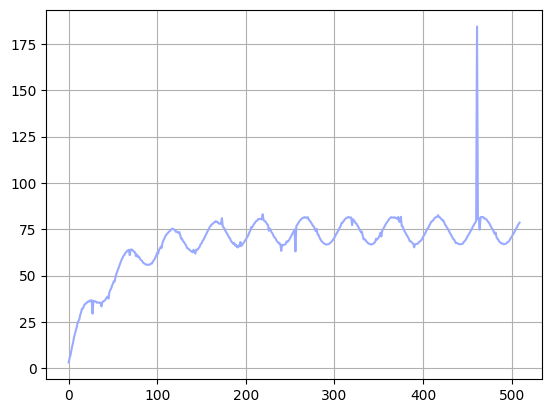

In [56]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

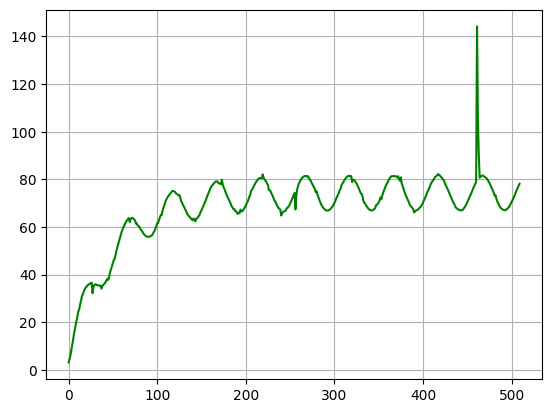

In [57]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

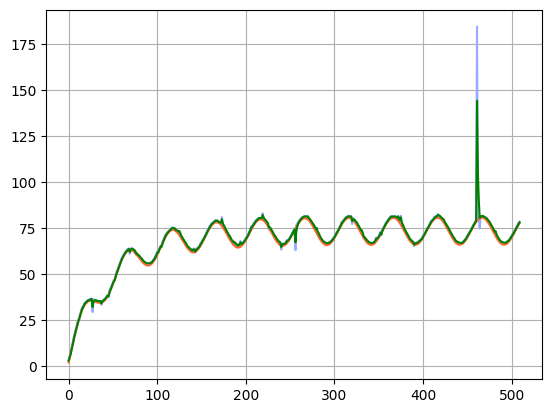

In [58]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

 <h1>L = 10 ** -1</h1>

In [16]:
L = 10 ** -1

I0 = 0
U0 = 0

I = []
U = []
Ur = []
Time = []

t = 0
dt = 0.0002
q=0

In [17]:
while t < 0.202:
    I0, U0 = runge_kutta(I0, U0, t, dt, diL, dUC)
    Ur.append(Ur3(I0, U0, t))
    t += dt
    q+=1
    Time.append(t)
    I.append(I0)
    U.append(U0)

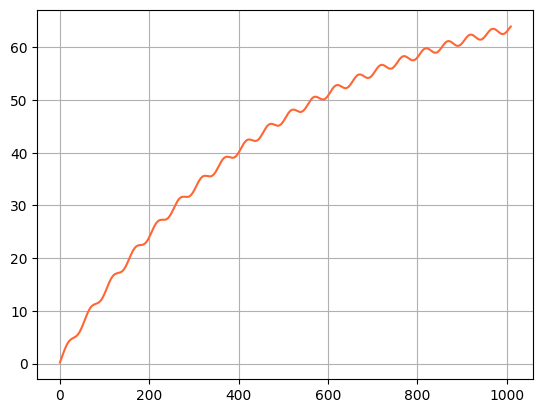

In [63]:
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.grid(True)
plt.show()

<h2> Рандомный шум</h2>

In [22]:
d = np.array(list(zip(Time, I)))
dn = d + (np.random.rand(q, 2) - 0.5) * np.array([2e-2, 6])

fix = kalman_filter(dn, R=np.eye(2)*0.08)

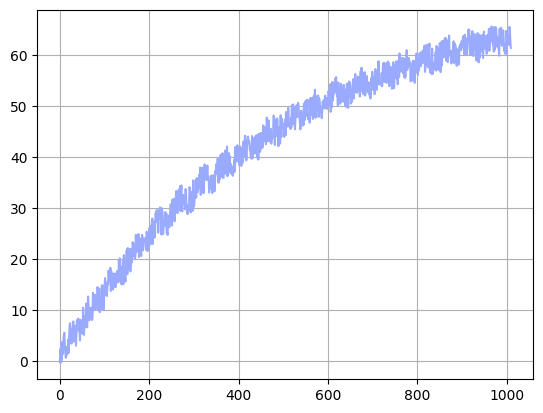

In [23]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

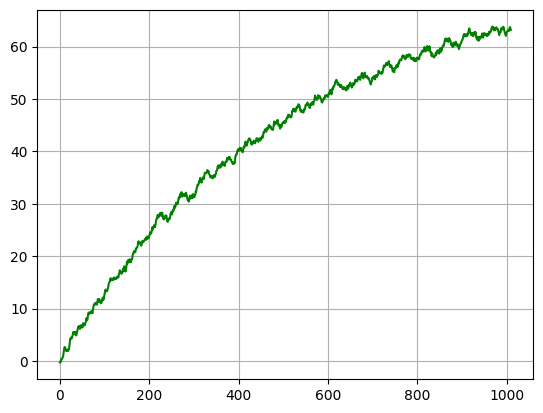

In [24]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

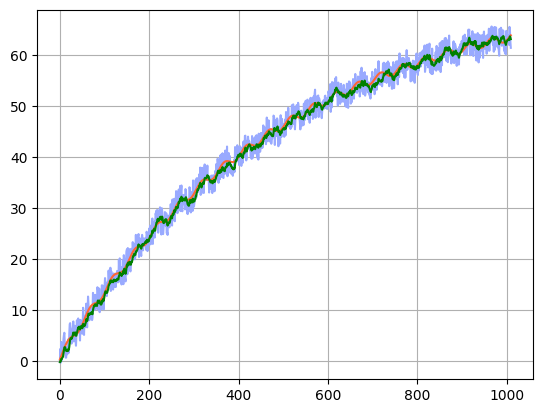

In [25]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2> Белый шум</h2>

In [18]:
d = np.array(list(zip(Time, I)))
dn =  d + np.random.normal(0, 1, (q, 2)) * np.array([1, 1])

fix = kalman_filter(dn, R=np.eye(2)*0.1)

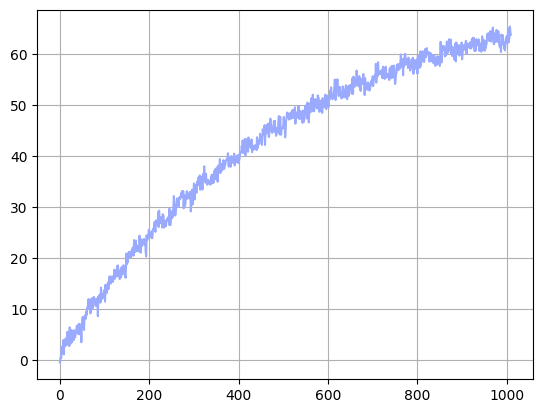

In [19]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

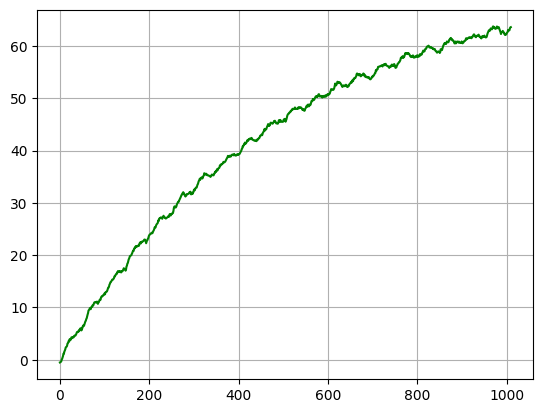

In [20]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

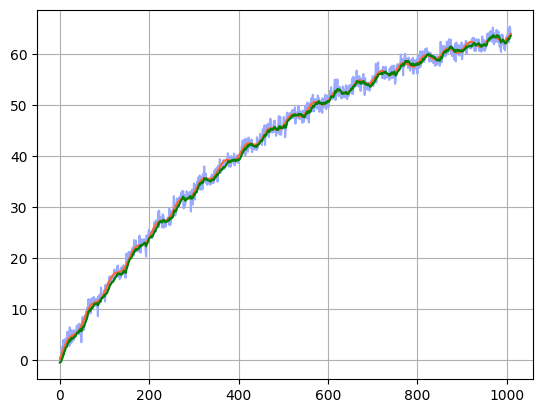

In [21]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

<h2>Распределение Коши</h2>

In [72]:
d = np.array(list(zip(Time, I)))
dn = d + cauchy.rvs(1, 0.1, (q, 2)) * np.array([1, 1])

fix = kalman_filter(dn)

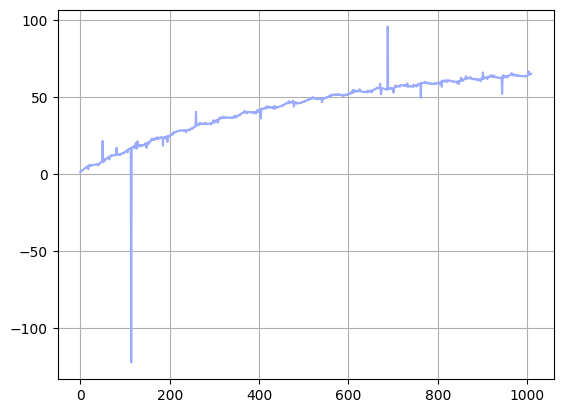

In [73]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.grid(True)
plt.show()

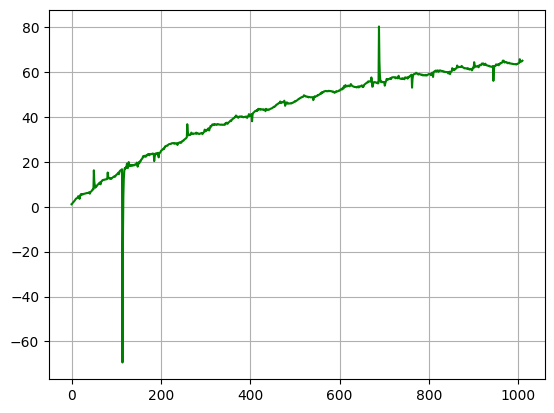

In [74]:
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()

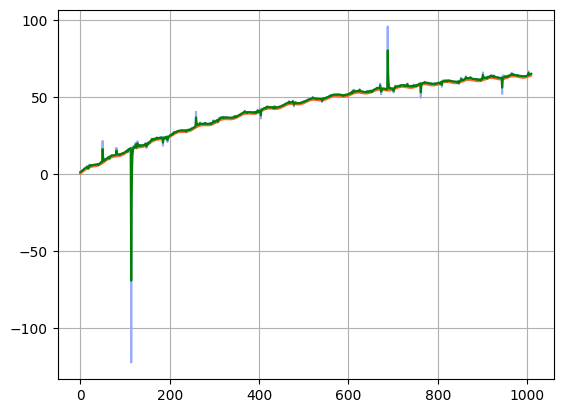

In [75]:
plt.plot(dn[:, 1], label="Измерение", color="#99AAFF")
plt.plot(I, label="Истинное значение", color="#FF6633")
plt.plot(fix[:, 1], label="Оценка фильтра", color="green")
plt.grid(True)
plt.show()